In [103]:
# Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

# Problem Statement
Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. 

Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

# Goal

Determine credit risk category of bank customers: Good or Bad.

# Exploring Data

In [104]:
df = pd.read_csv('loan_data_2007_2014.csv', engine='python', sep=None)

In [105]:
pd.set_option('display.max_columns', None)
df.sample(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
244891,244891,35653466,38348905,20000,20000,20000.0,36 months,10.49,649.96,B,B3,Video Technican,10+ years,MORTGAGE,70000.0,Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=35653466,NaN,debt_consolidation,Debt consolidation,809xx,CO,16.49,0.0,Jul-88,1.0,27.0,NaN,10.0,0.0,20729,64.0,35.0,f,13488.78,13488.78,8454.04,8454.04,6511.22,1942.82,0.0,0.0,0.0,Dec-15,649.96,Jan-16,Jan-16,0.0,32.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,3840.0,191458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32400.0,NaN,NaN,NaN


**Feature Explanation**

In [106]:
fd = pd.read_excel('LCDataDictionary.xlsx')

In [107]:
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 100)
fd.head(78)

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for that loan at that point in time.,Jumlah total yang dilakukan oleh investor untuk pinjaman itu pada saat itu.
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan application,Negara yang disediakan oleh peminjam dalam aplikasi pinjaman
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by the borrower during registration.,v
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pen...
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borro...,NaN
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya pengumpulan pos
8,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the ...,Jumlah 30+ hari insiden kenakalan yang lewat dalam file kredit peminjam selama 2 tahun terakhir


In [108]:
df.id.nunique()

466285

In [109]:
df.member_id.nunique()

466285

1 row of data represents 1 borrower.

In [110]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [111]:
# check duplicate rows
df.duplicated().sum()

0

In [112]:
# check missing values
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [113]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [114]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [115]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [116]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [117]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [118]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [119]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [120]:
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [121]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [122]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [123]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [124]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [125]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

**Drop columns**

More than 70% missing values: mths_since_last_record, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m, mths_since_last_delinq.

Identifiers: Unnamed: 0, member id, url, title, desc, zip_code, emp_title, addr_state, and policy_code.

Drop sub_grad as it is similar as the grade column.

Drop dti_joint because it is similar to dti.

Drop out_prncp_inv because it is similar to out_prncp.

Drop total_pymnt_inv because it is similar to total_pymnt.

Drop funded_amnt_inv because it is similar to funded_amnt

Drop features that contain information about the outcome: next_pymnt, recoveries.

Drop application_type because only 1 unique value.

Columns that are not relevant to predicting bad borrowers: collection_recovery_fee, pymnt_plan (there is no description for this column)

For now, column id will not be erased in case groupby id is needed later.

In [126]:
# drop unneeded columns
df.drop(['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint',
         'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 
         'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 
         'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_delinq', 
         'Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code', 'emp_title', 'addr_state', 'policy_code', 
         'sub_grade', 'dti_joint', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv', 
         'next_pymnt_d', 'recoveries', 'application_type',
         'collection_recovery_fee', 'pymnt_plan'], axis=1, inplace=True)

# Defining Label

In [127]:
df.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

We define a "bad" borrower as a member that is: Charged Off, Late (31-120 days), Default, or Does not meet the credit policy. Status:Charged Off

In [128]:
# create new column as target
df['bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)',
                                                     'Default',
                                                      'Does not meet the credit policy. Status:Charged Off']),
                              1, 0)

In [129]:
# drop loan_status
df.drop(['loan_status'], axis=1, inplace=True)

In [130]:
df['bad'].value_counts(normalize=True)*100

bad
0    89.069346
1    10.930654
Name: proportion, dtype: float64

After labeling as bad/good loan, the number of people who have bad loan is much smaller than people with good loan -> imbalanced dataset. Later we will address this imbalance by oversampling (SMOTE).

# Data Preprocessing

In [131]:
df1 = df.copy()

In [132]:
# check missing values
df1.isnull().sum()

loan_amnt                         0
funded_amnt                       0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
last_pymnt_d                

### emp_length

In [133]:
df1['emp_length'] = df1['emp_length'].str.replace('10+ years', '10')
df1['emp_length'] = df1['emp_length'].str.replace('< 1 year', '0.5')
df1['emp_length'] = df1['emp_length'].str.replace(' years', '')
df1['emp_length'] = df1['emp_length'].str.replace(' year', '')

In [134]:
df1['emp_length'] = df1['emp_length'].str.replace('10+', '10')

In [135]:
df1['emp_length'].unique()

array(['10', '0.5', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [136]:
df1['emp_length'] = pd.to_numeric(df1['emp_length'])

In [137]:
# impute emp_length with 0
df1['emp_length'].fillna(value = 0, inplace = True)

In [138]:
df1['emp_length'].unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        0. ])

In [139]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].fillna(df1['earliest_cr_line'].mode()[0])

In [140]:
df1['earliest_cr_line'].isnull().sum()

0

In [141]:
df1['last_pymnt_d'] = df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0])

In [142]:
df1['last_pymnt_d'].isnull().sum()

0

In [143]:
df1['last_credit_pull_d'] = df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0])

In [144]:
df1['last_credit_pull_d'].isnull().sum()

0

In [145]:
df1['annual_inc'] = df1['annual_inc'].fillna(df1['annual_inc'].median())

In [146]:
df1['annual_inc'].isnull().sum()

0

In [147]:
df1['delinq_2yrs'].fillna(0, inplace = True)

In [148]:
df1['delinq_2yrs'].isnull().sum()

0

In [149]:
# inq_last_6mths
df1['inq_last_6mths'].fillna(0, inplace = True)

In [150]:
df1['inq_last_6mths'].isnull().sum()

0

In [151]:
# open_acc
df1['open_acc'].fillna(0, inplace = True)

In [152]:
df1['open_acc'].isnull().sum()

0

In [153]:
# pub_rec
df1['pub_rec'].fillna(0, inplace = True)

In [154]:
df1['pub_rec'].isnull().sum()

0

In [155]:
# revol_util 
df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].median())

In [156]:
df1['revol_util'].isnull().sum()

0

In [157]:
# total_acc
df1['total_acc'].fillna(0, inplace = True)

In [158]:
df1['total_acc'].isnull().sum()

0

In [159]:
# collections_12_mths_ex_med
df1['collections_12_mths_ex_med'].fillna(0, inplace = True)

In [160]:
df1['collections_12_mths_ex_med'].isnull().sum()

0

In [161]:
# acc_now_delinq
df1['acc_now_delinq'].fillna(0, inplace = True)

In [162]:
df1['acc_now_delinq'].isnull().sum()

0

In [163]:
# tot_coll_amt
df1['tot_coll_amt'].fillna(0, inplace = True)

In [164]:
df1['tot_coll_amt'].isnull().sum()

0

In [165]:
# tot_cur_bal
df1['tot_cur_bal'].fillna(0, inplace = True)

In [166]:
df1['tot_cur_bal'].isnull().sum()

0

In [167]:
# impute total_rev_hi_lim with same value as funded_amnt
df1['total_rev_hi_lim'].fillna(df1['funded_amnt'], inplace = True)

In [168]:
df1['total_rev_hi_lim'].isnull().sum()

0

In [169]:
df1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_

## date

In [170]:
# change data type 'issue_d' from object to datetime 
# change data type 'earliest_cr_line' from object to datetime 
# change data type 'last_pymnt_d' from object to datetime
# change data type 'last_credit_pull_d' from object to datetime
# assume present date is the latest date in 'last_pymnt_d'(Last month payment was received) or 'last_credit_pull_d'(The date LC pulled credit for this loan), which is Jan-16

In [171]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%b-%y')
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format='%b-%y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format='%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format='%b-%y')

In [172]:
# convert months to duration (calculate the days/months from that date until present date)
# assume present date is Jan-16
present_date = pd.to_datetime('January 2016')

# Calculate the duration in months
df1['issue_d'] = ((present_date - df1['issue_d']) / pd.Timedelta(days=30)).astype(int)
df1['earliest_cr_line'] = ((present_date - df1['earliest_cr_line']) / pd.Timedelta(days=30)).astype(int)
df1['last_pymnt_d'] = ((present_date - df1['last_pymnt_d']) / pd.Timedelta(days=30)).astype(int)
df1['last_credit_pull_d'] = ((present_date - df1['last_credit_pull_d']) / pd.Timedelta(days=30)).astype(int)

In [173]:
df1['issue_d'].unique()

array([ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24])

## term

In [174]:
df1['term'] = df1['term'].str.replace(' months', '')
df1['term'] = df1['term'].str.replace(' ', '')

In [175]:
df1['term'] = pd.to_numeric(df1['term'])

In [176]:
df1['term'].unique()

array([36, 60], dtype=int64)

# Feature Selection

In [177]:
# check correlation between features
numerical = df1.select_dtypes(exclude='object')
corr = numerical.corr()
corr

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad
loan_amnt,1.000000,0.998548,0.412870,0.167183,0.949666,0.135590,0.370893,-0.129913,0.057319,0.006869,0.159067,-0.020269,0.204315,-0.081108,0.331423,0.117676,0.235384,0.518700,0.743841,0.612777,0.715876,0.043650,-0.131981,0.304243,-0.087205,-0.008039,0.006288,-0.002024,0.330107,0.315523,0.011819
funded_amnt,0.998548,1.000000,0.410862,0.167921,0.951787,0.135992,0.370311,-0.137490,0.058673,0.007414,0.158089,-0.020910,0.205117,-0.080564,0.331039,0.118803,0.235258,0.521451,0.743363,0.612318,0.715664,0.043350,-0.137659,0.304178,-0.091535,-0.007794,0.006476,-0.001989,0.333025,0.317144,0.011003
term,0.412870,0.410862,1.000000,0.443395,0.159631,0.090521,0.069950,-0.087621,0.091912,0.004149,0.051839,0.010003,0.077787,-0.022778,0.092577,0.084113,0.101391,0.434307,0.174923,0.009798,0.534333,0.011915,-0.107388,0.111597,-0.064080,0.000373,0.007726,-0.001435,0.118782,0.074892,0.063565
int_rate,0.167183,0.167921,0.443395,1.000000,0.148790,0.025673,-0.046069,-0.072762,0.159657,0.079209,-0.077700,0.205677,0.012447,0.066712,-0.004589,0.323249,-0.032869,0.137427,0.127035,-0.032130,0.485154,0.057875,-0.046715,0.075609,-0.050699,0.020319,0.030341,0.001416,-0.044509,-0.099807,0.172361
installment,0.949666,0.951787,0.159631,0.148790,1.000000,0.118408,0.368145,-0.118169,0.049919,0.017028,0.141813,0.002305,0.196975,-0.070064,0.320239,0.136759,0.216034,0.408838,0.764360,0.663399,0.641948,0.052341,-0.112131,0.299867,-0.079230,-0.006028,0.008927,-0.001522,0.304369,0.297528,0.013936
emp_length,0.135590,0.135992,0.090521,0.025673,0.118408,1.000000,0.100695,-0.073318,0.034140,0.031677,0.153782,-0.012222,0.056625,0.017057,0.095806,0.048299,0.112875,0.086611,0.098056,0.076708,0.107122,-0.008576,-0.075045,0.050227,-0.067158,-0.001441,0.009519,-0.001356,0.123975,0.083717,-0.020623
annual_inc,0.370893,0.370311,0.069950,-0.046069,0.368145,0.100695,1.000000,-0.034880,-0.188542,0.058895,0.153781,0.056674,0.157761,-0.015437,0.332316,0.037563,0.224657,0.168317,0.299784,0.275824,0.212952,0.020273,-0.027586,0.142156,-0.019867,-0.000445,0.017133,0.001907,0.430930,0.278310,-0.049863
issue_d,-0.129913,-0.137490,-0.087621,-0.072762,-0.118169,-0.073318,-0.034880,1.000000,-0.169432,-0.079443,0.030261,0.108230,-0.133788,-0.114001,-0.029703,-0.049052,-0.106050,-0.400534,0.160444,0.173026,0.034342,0.065037,0.758816,0.012640,0.567088,-0.050984,-0.028367,-0.006587,-0.273124,-0.167550,0.087225
dti,0.057319,0.058673,0.091912,0.159657,0.049919,0.034140,-0.188542,-0.169432,1.000000,-0.003667,0.023958,-0.012485,0.304018,-0.046166,0.143380,0.200284,0.228337,0.119984,-0.026007,-0.063895,0.089582,-0.005747,-0.152255,-0.043068,-0.134059,0.000335,0.009494,-0.002506,0.035464,0.086543,0.048102
delinq_2yrs,0.006869,0.007414,0.004149,0.079209,0.017028,0.031677,0.058895,-0.079443,-0.003667,1.000000,0.077217,0.018001,0.059174,-0.010803,-0.031103,-0.013167,0.130822,0.043871,-0.019676,-0.032080,0.024292,0.024388,-0.058138,-0.013728,-0.044248,0.039132,0.126533,0.000427,0.089490,-0.020224,0.001228


<Axes: >

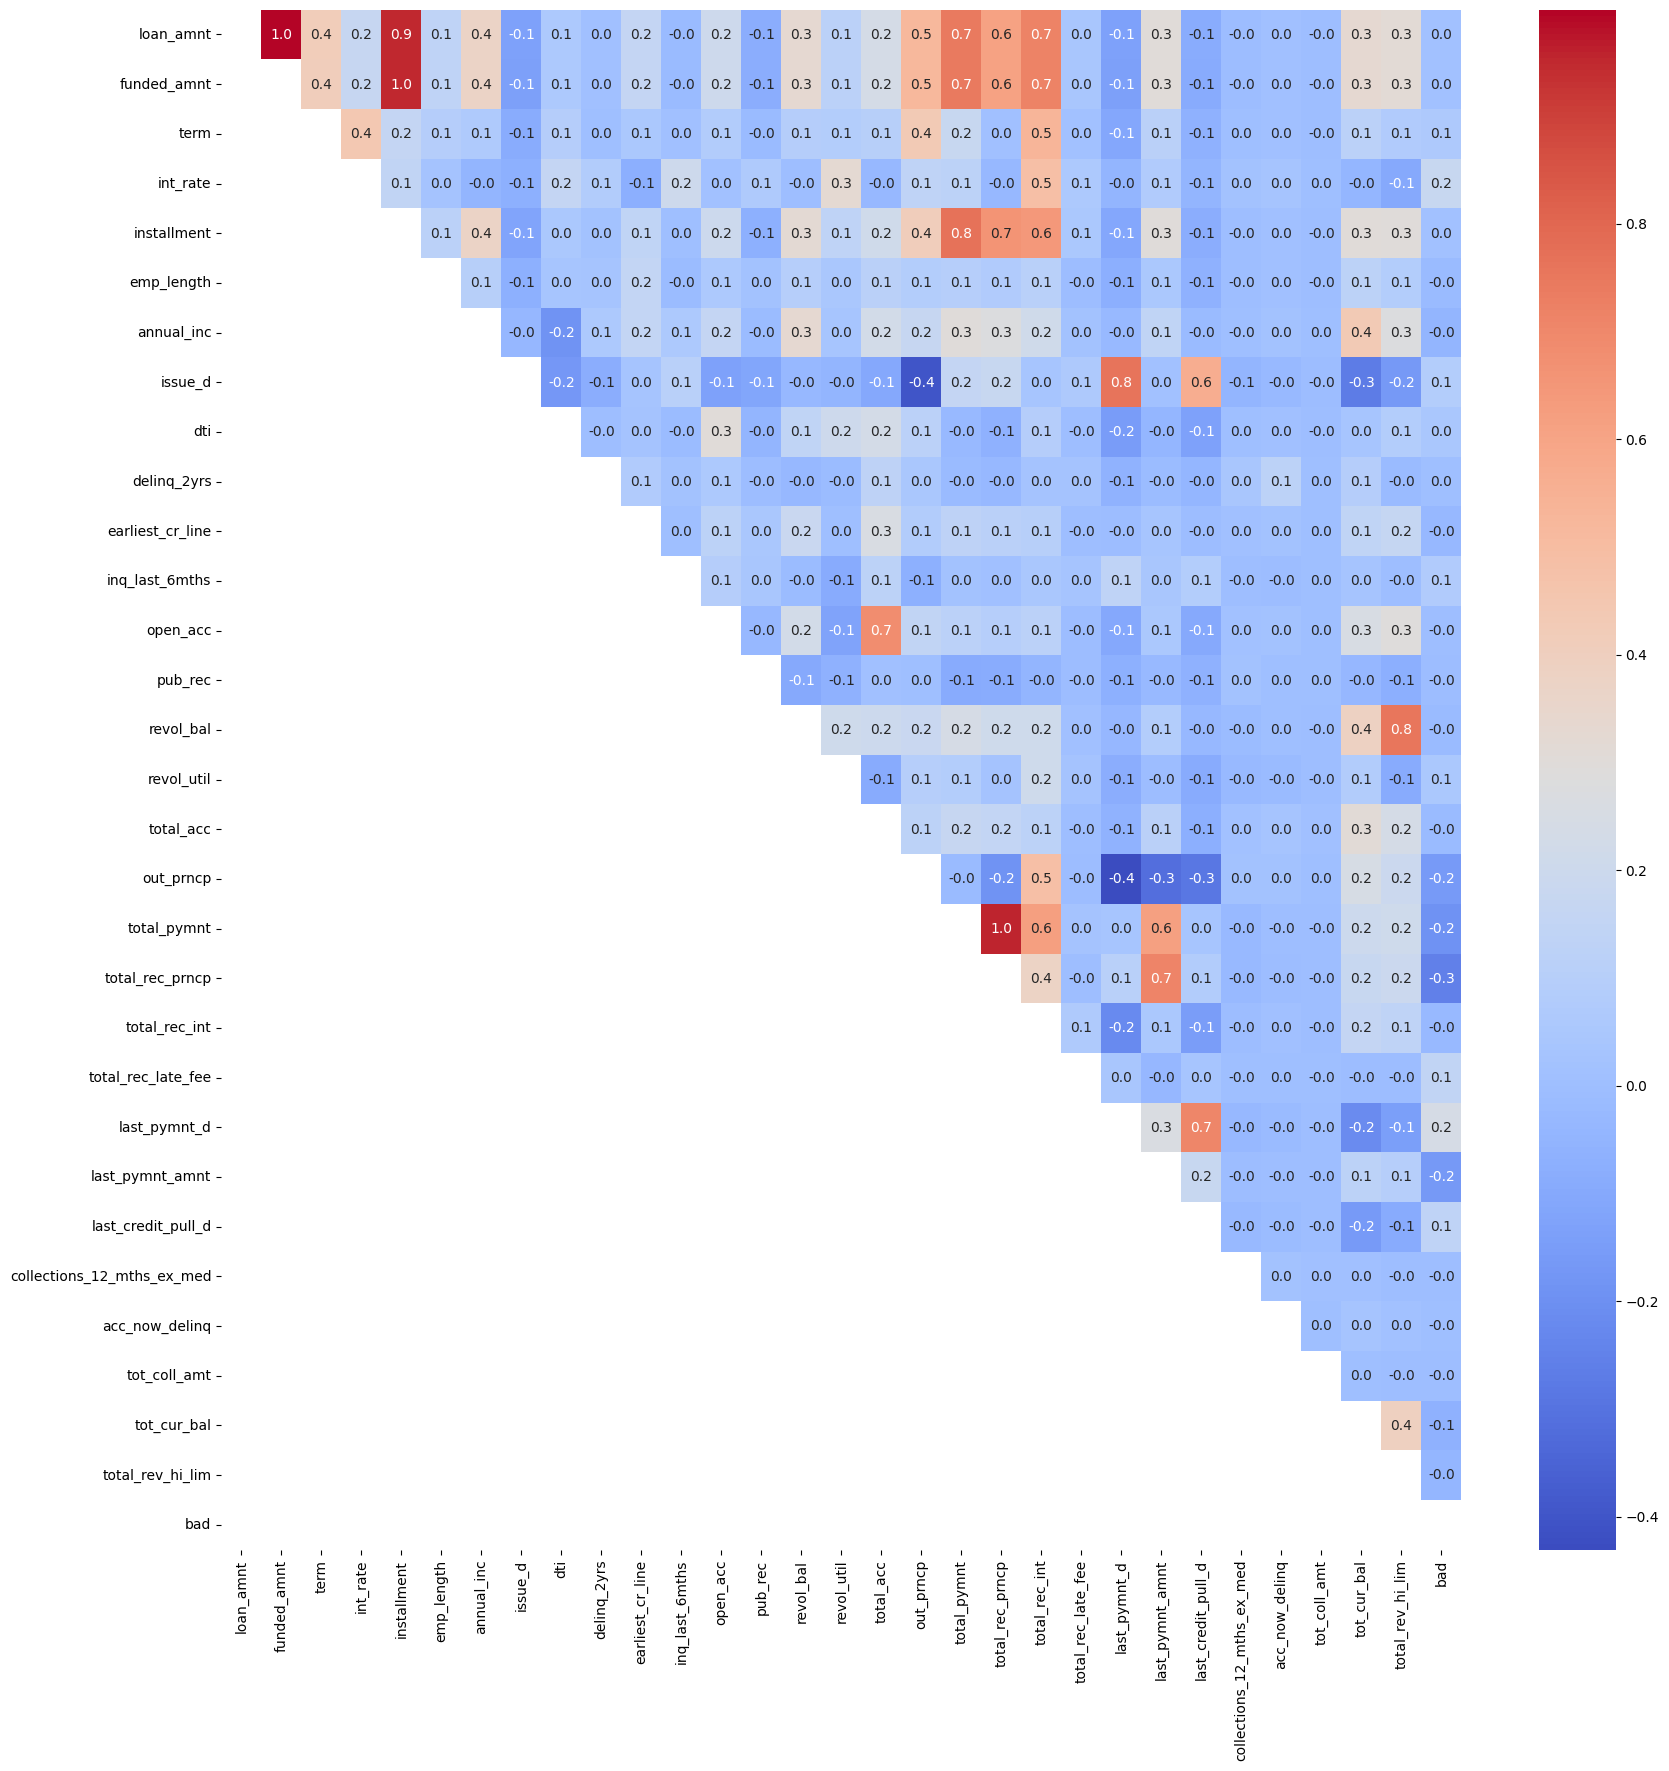

In [178]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(20,20))
sns.heatmap(mask, cmap='coolwarm', annot=True, fmt='.1f')

Multicollinearity: loan_amnt & installment, funded_amnt & installment, installment & total_pymnt, total_pymnt & total_rec_prncp, issue_d & last_payment_d, revol_bal & total_rev_hi_lim

In [179]:
# drop redundant features
df2 = df1.copy()
df2.drop(['installment', 'total_rec_prncp', 'last_pymnt_d', 'revol_bal'], axis=1, inplace=True)

# Feature Encoding

## Purpose

In [180]:
# one-hot encoding 'purpose'
dummy_purpose = pd.get_dummies(df2['purpose'], prefix='prps', dtype=int)
df2 = pd.concat([df2, dummy_purpose], axis=1)

In [181]:
df2.drop(['purpose'], axis=1, inplace=True)

## Grade

In [182]:
df2['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

Loans graded A have the lowest expected risk of loss.

In [183]:
# label encoding 'grade'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['grade']=le.fit_transform(df2['grade'])

In [184]:
df2['grade'].unique()

array([1, 2, 0, 4, 5, 3, 6])

## Home_ownership

In [185]:
# one-hot encoding 'home_ownership'
dummy_home = pd.get_dummies(df2['home_ownership'], prefix='home', dtype=int)
df2 = pd.concat([df2, dummy_home], axis=1)

In [186]:
df2.drop(['home_ownership'], axis=1, inplace=True)

## Verification_status

In [187]:
# label encoding 'verification_status'
map_ver = {'Not Verified':0, 'Verified':1, 'Source Verified':1}
df2['verification_status'] = df2['verification_status'].map(map_ver)

In [188]:
df2['verification_status'].unique()

array([1, 0], dtype=int64)

## List_status

In [189]:
# label encoding 'initial_list_status'
df2['initial_list_status']=le.fit_transform(df2['initial_list_status'])

In [190]:
df2['initial_list_status'].unique()

array([0, 1])

In [191]:
df2.shape

(466285, 50)

In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   term                        466285 non-null  int64  
 3   int_rate                    466285 non-null  float64
 4   grade                       466285 non-null  int32  
 5   emp_length                  466285 non-null  float64
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  int64  
 8   issue_d                     466285 non-null  int32  
 9   dti                         466285 non-null  float64
 10  delinq_2yrs                 466285 non-null  float64
 11  earliest_cr_line            466285 non-null  int32  
 12  inq_last_6mths              466285 non-null  float64
 13  open_acc      

# Feature Scaling

In [193]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [194]:
categorical_cols = [col for col in df2.select_dtypes(include='object').columns.tolist()]
numerical_cols = [col for col in df2.columns.tolist() if col not in categorical_cols + ['bad']]

In [195]:
# normalize all numerical data
scaler = StandardScaler()

df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [94]:
df2.head(3)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad,prps_car,prps_credit_card,prps_debt_consolidation,prps_educational,prps_home_improvement,prps_house,prps_major_purchase,prps_medical,prps_moving,prps_other,prps_renewable_energy,prps_small_business,prps_vacation,prps_wedding,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT
0,-1.124392,-1.122963,-0.616225,-0.729587,-0.618831,1.145732,-0.896549,0.682703,1.433732,1.328632,-0.357012,1.655900,0.178920,-1.641166,-0.31429,1.160093,-1.384557,-0.734077,-0.693944,-0.687137,-0.695548,-0.123464,-0.531492,-0.419305,-0.083608,-0.058307,-0.012089,-0.792648,-0.643296,0,-0.108213,1.864605,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409
1,-1.426088,-1.425101,1.622784,0.330634,0.138524,-1.422685,-0.787386,0.682703,1.433732,-2.065791,-0.357012,-0.169444,3.843328,-1.641166,-0.31429,-1.971760,-1.815538,-0.734077,-0.693944,-1.274191,-0.867019,-0.123464,-0.540846,2.481383,-0.083608,-0.058307,-0.012089,-0.792648,-0.714540,1,9.241054,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409
2,-1.438156,-1.437186,-0.616225,0.488979,0.138524,1.145732,-1.110292,-1.464765,1.433732,-1.082491,-0.357012,-0.494649,1.095022,-1.841641,-0.31429,1.783934,-1.298361,-0.734077,-0.693944,-1.032837,-0.799187,-0.123464,-0.445387,-0.419305,-0.083608,-0.058307,-0.012089,-0.792648,-0.717390,0,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,8.092507,-0.073227,-0.071065,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409


# Modeling - Train

In [96]:
from sklearn.model_selection import train_test_split

In [196]:
X = df2.drop('bad', axis=1)
y = df2['bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
X_train.shape, X_test.shape

((373028, 49), (93257, 49))

## Imbalance Resampling

In [198]:
# before resampling
y_train.value_counts()

bad
0    332250
1     40778
Name: count, dtype: int64

In [200]:
from imblearn.over_sampling import SMOTE

In [201]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [202]:
# after resampling
y_train.value_counts()

bad
0    332250
1    332250
Name: count, dtype: int64

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [205]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\athiy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [206]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [207]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Modeling - Evaluation

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

In [235]:
def eval_classification(model):
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    y_pred_proba = model.predict_proba(X_test)

    # Generate predicted probabilities of positive class for training and test sets
    train_probabilities = model.predict_proba(X_train)[:, 1]
    test_probabilities = model.predict_proba(X_test)[:, 1]

    # Calculate KS statistic for training set
    fpr_train, tpr_train, _ = roc_curve(y_train, train_probabilities)
    ks_train = max(tpr_train - fpr_train)

    # Calculate KS statistic for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
    ks_test = max(tpr_test - fpr_test)

    print(f"{model}")
    print("AUC (Train): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (Test): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("KS (Train): %.4f" % ks_train)
    print("KS (Test): %.4f" % ks_test)

## Logistic Regression

In [236]:
eval_classification(lr)

LogisticRegression()
AUC (Train): 0.9855
AUC (Test): 0.9714
KS (Train): 0.9004
KS (Test): 0.8474


## Decision Tree

In [237]:
eval_classification(dt)

DecisionTreeClassifier()
AUC (Train): 1.0000
AUC (Test): 0.9309
KS (Train): 1.0000
KS (Test): 0.8618


## Random Forest

In [238]:
eval_classification(rf)

RandomForestClassifier()
AUC (Train): 1.0000
AUC (Test): 0.9814
KS (Train): 1.0000
KS (Test): 0.8750


I am not tuning hyperparameter due to hardware capacity.

In [241]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

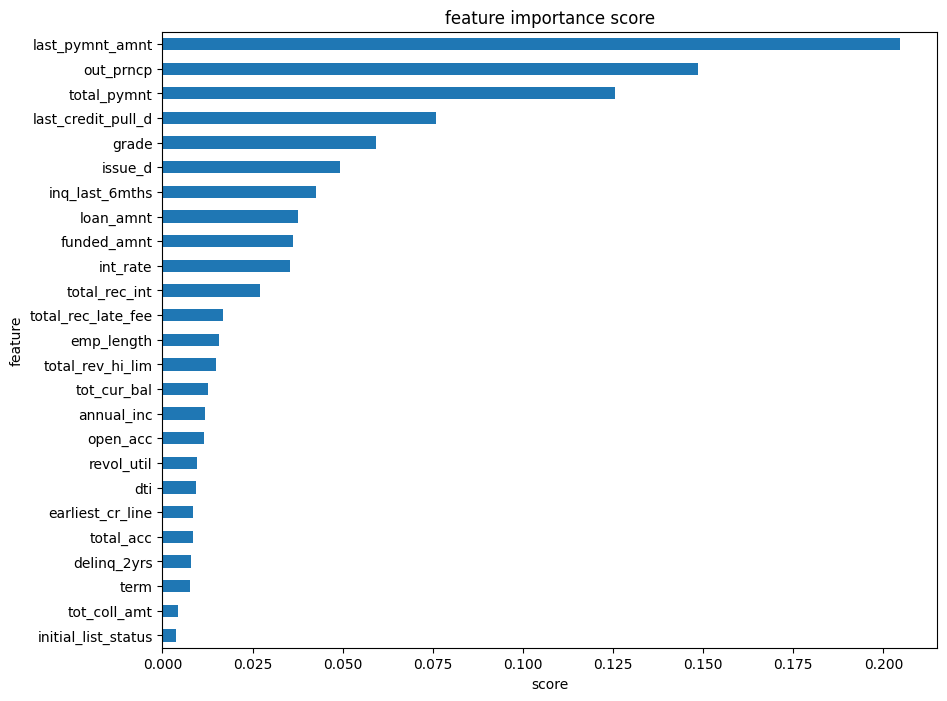

In [240]:
show_feature_importance(rf)

# Conclusion

The best fit model uses Random Forest algorithm and results in `AUC = 0.98` dan `KS = 0.87`.